In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
features = ['min_clust_coeff',
 'max_clust_coeff',
 'mean_clust_coeff',
 'var_clust_coeff',
 'median_clust_coeff',
 'min_node_betweenness_centrality',
 'max_node_betweenness_centrality',
 'mean_node_betweenness_centrality',
 'var_node_betweenness_centrality',
 'median_node_betweenness_centrality',
 'num_connected_components',
 'max_connected_components_size',
 'min_connected_components_size',
 'mean_connected_components_size',
 'var_connected_components_size',
 'median_connected_components_size',
 'min_eigenvector_centrality',
 'max_eigenvector_centrality',
 'mean_eigenvector_centrality',
 'var_eigenvector_centrality',
 'median_eigenvector_centrality',
 'min_pagerank_centrality',
 'max_pagerank_centrality',
 'mean_pagerank_centrality',
 'var_pagerank_centrality',
 'median_pagerank_centrality',
 'min_degrees_max_spanning_tree',
 'max_degrees_max_spanning_tree',
 'mean_degrees_max_spanning_tree',
 'var_degrees_max_spanning_tree',
 'median_degrees_max_spanning_tree',
 'min_shortest_path_length',
 'max_shortest_path_length',
 'var_shortest_path_length',
 'mean_shortest_path_length',
 'degree_assortativity',
 'node_nums',
 'edge_nums',
 'min_degree',
 'max_degree',
 'mean_degree',
 'var_degree',
 'median_degree',
 'graph_density',
 'node_nums_div_edge_nums',
 'edge_nums_div_node_nums'
 ]

In [ ]:
# load the data
model_num = '2'
root_folder = 'drive/MyDrive/Research/Projects/Graph_Sampling_Prediction/notebooks-export/'
df_all = pd.read_csv(root_folder + 'data/model_' + model_num + '/D3_v4.csv')
df_train = df_all[df_all['partition']=='train']
df_test = df_all[df_all['partition']=='test']

df_synthetic_test = df_test[df_test['synthetic'] == 'synthetic_large']
df_realworld_test = df_test[(df_test['synthetic'] == 'realworld_medium') | (df_test['synthetic'] == 'realworld_large')]
list(df_train.columns)

['Unnamed: 0',
 'graph_ID',
 'min_clust_coeff',
 'max_clust_coeff',
 'mean_clust_coeff',
 'var_clust_coeff',
 'median_clust_coeff',
 'clust_coeff_calc_time',
 'min_node_betweenness_centrality',
 'max_node_betweenness_centrality',
 'mean_node_betweenness_centrality',
 'var_node_betweenness_centrality',
 'median_node_betweenness_centrality',
 'num_connected_components',
 'max_connected_components_size',
 'min_connected_components_size',
 'mean_connected_components_size',
 'var_connected_components_size',
 'median_connected_components_size',
 'connected_components_calc_time',
 'min_eigenvector_centrality',
 'max_eigenvector_centrality',
 'mean_eigenvector_centrality',
 'var_eigenvector_centrality',
 'median_eigenvector_centrality',
 'eigenvector_centrality_calc_time',
 'min_pagerank_centrality',
 'max_pagerank_centrality',
 'mean_pagerank_centrality',
 'var_pagerank_centrality',
 'median_pagerank_centrality',
 'pagerank_centrality_calc_time',
 'min_degrees_max_spanning_tree',
 'max_degree

In [ ]:
nan_list = list(df_realworld_test.isna().any())
print(nan_list)
for i in range(len(nan_list)):
  if nan_list[i] == True:
    print(i)
df_realworld_test[features]

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

,min_clust_coeff,max_clust_coeff,mean_clust_coeff,var_clust_coeff,median_clust_coeff,min_node_betweenness_centrality,max_node_betweenness_centrality,mean_node_betweenness_centrality,var_node_betweenness_centrality,median_node_betweenness_centrality,...,node_nums,edge_nums,min_degree,max_degree,mean_degree,var_degree,median_degree,graph_density,node_nums_div_edge_nums,edge_nums_div_node_nums
13786,0.0,1.0,0.630627,0.127098,0.666667,0.0,3.814736e+06,2.455334e+04,6.682573e+09,228.931268,...,0.000053,5.049204e-06,1,504,21.101699,934.232425,9.0,0.001124,0.094779,10.550850
13787,0.0,1.0,0.630627,0.127098,0.666667,0.0,3.814736e+06,2.455334e+04,6.682573e+09,228.931268,...,0.000053,5.049204e-06,1,504,21.101699,934.232425,9.0,0.001124,0.094779,10.550850
13788,0.0,1.0,0.630627,0.127098,0.666667,0.0,3.814736e+06,2.455334e+04,6.682573e+09,228.931268,...,0.000053,5.049204e-06,1,504,21.101699,934.232425,9.0,0.001124,0.094779,10.550850
13789,0.0,1.0,0.630627,0.127098,0.666667,0.0,3.814736e+06,2.455334e+04,6.682573e+09,228.931268,...,0.000053,5.049204e-06,1,504,21.101699,934.232425,9.0,0.001124,0.094779,10.550850
13790,0.0,1.0,0.630627,0.127098,0.666667,0.0,3.814736e+06,2.455334e+04,6.682573e+09,228.931268,...,0.000053,5.049204e-06,1,504,21.101699,934.232425,9.0,0.001124,0.094779,10.550850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14138,0.0,1.0,0.088093,0.046496,0.000000,0.0,1.121236e+10,1.213314e+06,5.234789e+14,17.701087,...,0.000001,1.692869e-07,1,17643,15.327295,10239.923253,2.0,0.000020,0.130486,7.663648
14139,0.0,1.0,0.088093,0.046496,0.000000,0.0,1.121236e+10,1.213314e+06,5.234789e+14,17.701087,...,0.000001,1.692869e-07,1,17643,15.327295,10239.923253,2.0,0.000020,0.130486,7.663648
14140,0.0,1.0,0.088093,0.046496,0.000000,0.0,1.121236e+10,1.213314e+06,5.234789e+14,17.701087,...,0.000001,1.692869e-07,1,17643,15.327295,10239.923253,2.0,0.000020,0.130486,7.663648
14141,0.0,1.0,0.088093,0.046496,0.000000,0.0,1.121236e+10,1.213314e+06,5.234789e+14,17.701087,...,0.000001,1.692869e-07,1,17643,15.327295,10239.923253,2.0,0.000020,0.130486,7.663648


In [ ]:
df_test_syn_set11 = pd.read_csv(root_folder + 'data/generated_graphs/set_11/D3.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df_synthetic_train = df[(df['partition']=='train')].reset_index()[features+['graph_ID']].drop_duplicates()
#df_synthetic_test = df_test_syn_set11[(df['partition']=='test') & (df['synthetic']=='synthetic')].reset_index()[features+['graph_ID']].drop_duplicates()
#df_realworld_test = df[(df['partition']=='test') & (df['synthetic']=='realworld')].reset_index()[features+['graph id']].drop_duplicates()

In [ ]:
df_train['target'] = 0
df_synthetic_test['target'] = 1
df_realworld_test['target'] = 2

In [ ]:
def now_vs_after(df):
    print('Now: {}, after: {}'.format(len(df.index), len(df.drop_duplicates().index)))

#now_vs_after(df)
now_vs_after(pd.concat([df_train, df_synthetic_test]))
now_vs_after(df_train)
now_vs_after(df_synthetic_test)
now_vs_after(df_realworld_test)

Now: 12466, after: 12466
Now: 11729, after: 11729
Now: 737, after: 737
Now: 357, after: 357


In [ ]:
frames = [df_train, df_synthetic_test, df_realworld_test]
#frames = [df_synthetic_train, df_realworld_test]
dataset = pd.concat(frames)

In [ ]:
a = df_train[features].sort_values(by=features).reset_index(drop=True)
b = df_synthetic_test[features].sort_values(by=features).reset_index(drop=True)

print (a.equals(b))
print("A: {} vs. B: {}".format(len(a.index), len(b.index)))

False
A: 11729 vs. B: 737


In [ ]:
X_embedded = TSNE(n_components=2).fit_transform(dataset[features], dataset['target'])

In [ ]:
# CASE A: we compare train vs. real-world test
# CASE B: we compare train vs. synthetic test
def prepare_tSNE_visualization(X_embedded, dataset, case):
    filter_value = -1
    if case == 'A':
        filter_value = 1
    if case == 'B':
        filter_value = 2
    x = []
    y = []
    target = []
    graphids = []
    for i in range(len(dataset.index)):
        target_value = dataset.iloc[i]['target']
        if(target_value!=filter_value):
            graphid = dataset.iloc[i]['graph_ID']
            if target_value!=filter_value:
                x = x + [X_embedded[i][0]]
                y = y + [X_embedded[i][1]]
                target = target + [target_value]
                graphids = graphids + [graphid]
    return x, y, target, graphids

In [ ]:
def get_maps_for_key(df):
    A = df[['x', 'y']].values
    maps = {}
    for Z in A:
        key=str(Z)
        count = np.equal(A, Z).all(axis=1).sum()+1
        maps[key]={'x': Z[0], 'y': Z[1], 'size': np.log(count)}
    return maps

In [ ]:
#df_tsne = pd.DataFrame.from_dict({'x': x, 'y': y, 'target': target})

In [ ]:
#maps = get_maps_for_key(df_tsne)

In [ ]:
#[x for x in maps.values() if x['size']!=0.6931471805599453]

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def create_tSNE_plot(x, y, target, colors, title, filename, variable_name_1, variable_name_2):
    plt.scatter(x, y, c=target, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.25)
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    #plt.legend([variable_name_1, variable_name_2], loc='upper left')
    plt.title(title)
    #loc = np.arange(0, max(target), max(target)/float(len(colors)))

    plt.savefig(root_folder + "out/figures/{}.pdf".format(filename), format="pdf", bbox_inches='tight')

In [ ]:
dataset[dataset.target==2].head()[['graph_ID']].drop_duplicates()

,graph_ID
13786,test_Real_arxiv_astro_ph.csv


In [ ]:
x, y, target, graphids = prepare_tSNE_visualization(X_embedded, dataset, 'A')

In [ ]:
data = {'graphid': graphids, 'x': x, 'y': y, 'target': target}
mapping_to_graphid = pd.DataFrame.from_dict(data)
mapping_to_graphid.head(5)

,graphid,x,y,target
0,train_Syn_albert_barabasi_graphs_range_size11_...,73.239517,74.844414,0
1,train_Syn_albert_barabasi_graphs_range_size11_...,76.308571,75.083961,0
2,train_Syn_albert_barabasi_graphs_range_size11_...,73.239517,74.844414,0
3,train_Syn_albert_barabasi_graphs_range_size11_...,76.308571,75.083961,0
4,train_Syn_albert_barabasi_graphs_range_size11_...,76.308571,75.083961,0


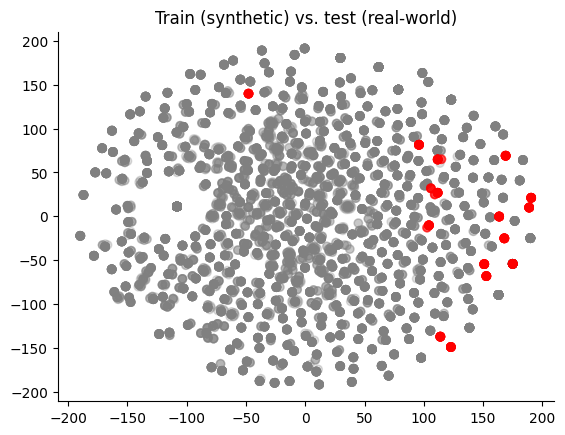

In [ ]:
colors = ['gray', 'red'] # CASE A
filename = 'tsne-train-vs-test-realworld'
root_folder = 'drive/MyDrive/Research/Projects/Graph_Sampling_Prediction/notebooks-export/'
create_tSNE_plot(x, y, target, colors, 'Train (synthetic) vs. test (real-world)', filename, 'Train set (sythentic)', 'Test set (real-world)')

In [ ]:
# category (i)
c_i = mapping_to_graphid[(mapping_to_graphid.x<-35)&(mapping_to_graphid.y>0)&(mapping_to_graphid.target==2)]
# category (ii)
c_ii = mapping_to_graphid[(mapping_to_graphid.x>-35)&(mapping_to_graphid.y>0)&(mapping_to_graphid.target==2)]
# category (iii)
c_iii = mapping_to_graphid[(mapping_to_graphid.x>-25)&(mapping_to_graphid.y>-15)&(mapping_to_graphid.target==2)]
# category (iv)
c_iv = mapping_to_graphid[(mapping_to_graphid.x>-25)&(mapping_to_graphid.y<-15)&(mapping_to_graphid.y>-25)&(mapping_to_graphid.target==2)]
# category (v)
c_v = mapping_to_graphid[(mapping_to_graphid.y<-20)&(mapping_to_graphid.x<-10)&(mapping_to_graphid.target==2)]
# category (vi)
c_vi = mapping_to_graphid[(mapping_to_graphid.y<-40)&(mapping_to_graphid.x>-10)&(mapping_to_graphid.target==2)]
# category (vii)
#c_vii = mapping_to_graphid[(mapping_to_graphid.y<-10)&(mapping_to_graphid.x>20)&(mapping_to_graphid.target==2)]

In [ ]:
c_vi

,graphid,x,y,target
1480,test_Real_econ-beaflw.mtx,-1.322029,-49.147701,2
1490,test_Real_econ-beacxc.mtx,-1.312701,-49.149509,2


In [ ]:
print("C_i: {}".format(c_i['graphid'].values[0]))
print("C_ii: {}, {}, {}".format(c_ii['graphid'].values[0], c_ii['graphid'].values[1], c_ii['graphid'].values[2]))
print("C_iii: {}, {}, {}".format(c_iii['graphid'].values[0], c_iii['graphid'].values[1], c_iii['graphid'].values[2]))
print("C_iv: {}, {}".format(c_iv['graphid'].values[0], c_iv['graphid'].values[1]))
print("C_v: {}, {}".format(c_v['graphid'].values[0], c_v['graphid'].values[1]))
print("C_vi: {}, {}".format(c_vi['graphid'].values[0], c_vi['graphid'].values[1]))
#print("C_v: {}, {}".format(c_v['graphid'].values[0], c_v['graphid'].values[1]))
#print("C_vi: {}, {}, {}".format(c_vi['graphid'].values[0], c_vi['graphid'].values[1], c_vi['graphid'].values[2]))
#print("C_vii: {}, {}".format(c_vii['graphid'].values[0], c_vii['graphid'].values[1]), c_vii['graphid'].values[2], c_vii['graphid'].values[3])

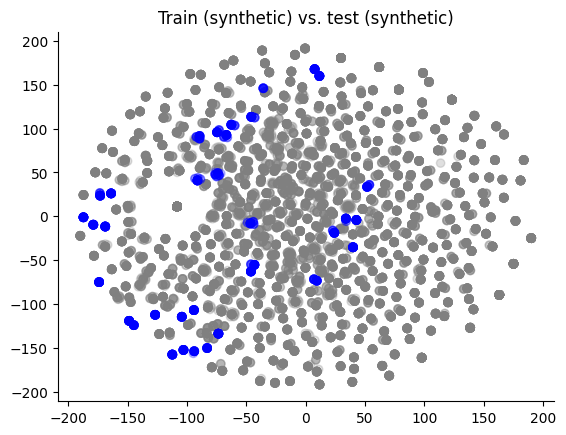

In [ ]:
x, y, target, graphids = prepare_tSNE_visualization(X_embedded, dataset, 'B')
colors = ['gray', 'blue'] # CASE B
filename = 'tsne-train-vs-test-synthetic'
create_tSNE_plot(x, y, target, colors, 'Train (synthetic) vs. test (synthetic)', filename, 'Train set (sythentic)', 'Test set (sythentic)')